In [355]:
import numpy as np
import matplotlib.pyplot as plt


#### We will define the transition matrix and the initial state distribution.


In [356]:
T = np.array([[0.7, 0.2, 0.1], [0.3, 0.4, 0.3], [0.2, 0.3, 0.5]])

PX0 = np.array([0.4, 0.3, 0.3])


#### I) Write a program that generates the n First distributions states.


In [357]:
def generate_states(n):
    state_distributions = [PX0]
    current_distribution = PX0

    for _ in range(n):
        next_distribution = current_distribution @ T
        state_distributions.append(next_distribution)
        current_distribution = next_distribution

    return state_distributions


#### II) Visualize your the dynamics of the underlying MC, where at each step you plot a simulation of the corresponding states' distribution.


In [358]:
# We define N and the number of columns

N = 20
n_columns = 20
state_distributions = generate_states(N)


In [359]:
def collapse(list, val):
    if val <= list[0]:
        return "red"
    elif val <= list[0] + list[1]:
        return "green"
    else:
        return "blue"


In [360]:
# We will simulate the dynamics of the MC

np.random.seed(0)

distributions = []
for state_distribution in state_distributions:
    distribution = [
        collapse(state_distribution, np.random.rand()) for i in range(n_columns)
    ]
    distributions.append(distribution)


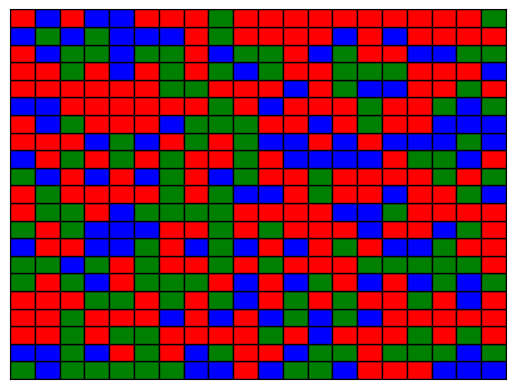

In [361]:
# We will now visualize it

fig, ax = plt.subplots()

for i in range(len(distributions)):
    for j in range(len(distributions[0])):
        color = distributions[i][j]
        square = plt.Rectangle((j, i), 1, 1, fc=color, ec="black")
        ax.add_patch(square)

ax.set_xlim(0, len(distributions[0]))
ax.set_ylim(0, len(distributions))
ax.set_xticks([])
ax.set_yticks([])

plt.show()
